In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd "/content/drive/MyDrive/clolab/Hackathon/"

/content/drive/MyDrive/clolab/Hackathon


In [ ]:
# Import thư viện
from sklearn import linear_model
import pandas as pd
import numpy as np
import math
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score 
import seaborn as sns
sns.set_style('whitegrid')
% matplotlib inline

# Lấy dữ liệu dạng Dataframe của sheet GDP từ file dữ liệu 
DATASET_Covid = pd.read_csv('covid_19_data.csv')
DATASET_Covid_Vietnam = DATASET_Covid[DATASET_Covid['Quốc gia/vùng'] == 'Vietnam']

SoNguoiBiNhiemVietNam = DATASET_Covid_Vietnam['Số người bị nhiễm']
SoNguoiTuVongVietNam = DATASET_Covid_Vietnam['Tử vong']
SoNguoiAmTinhVietNam = DATASET_Covid_Vietnam['Âm tính']

SoNguoiNhiem14NgayGanNhat = SoNguoiBiNhiemVietNam.iloc[-14:]
SoNguoiTuVong14NgayGanNhat = SoNguoiTuVongVietNam.iloc[-14:]
SoNguoiAmTinh14NgayGanNhat = SoNguoiAmTinhVietNam.iloc[-14:]

SoNguoiNhiem14Ngay = SoNguoiNhiem14NgayGanNhat - SoNguoiTuVong14NgayGanNhat - SoNguoiAmTinh14NgayGanNhat


In [ ]:
!pip install -U scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Cách viết import kiểu khác
import skfuzzy as fz
import numpy as np
from skfuzzy import control as ctrl

In [ ]:
# Xây dựng 4 không gian nền tương ứng
XC = np.arange(1,100001)
XD = np.arange(1,10001)
XB = [1,2,3]
XS = np.arange(1,11)

In [ ]:
# Định nghĩa tiền đề và kết luận dựa trên các biến ngôn ngữ
C = ctrl.Antecedent( XC,"Cases" )
D = ctrl.Antecedent( XD,"Deaths" )
B = ctrl.Antecedent( XB,"Border" )
S = ctrl.Consequent( XS,"Spread" )

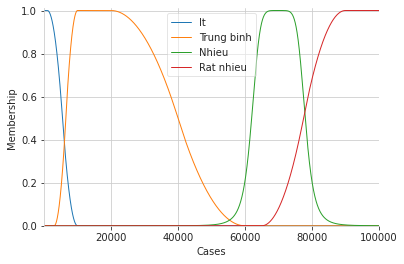

In [ ]:
C["It"] = fz.zmf( C.universe,1000,10000 )
C["Trung binh"] = fz.pimf( C.universe,3000,10000,20000,60000 )
C["Nhieu"] = fz.gbellmf( C.universe,8000,3,70000 )
C["Rat nhieu"] = fz.smf( C.universe,65000,90000 )
C.view()

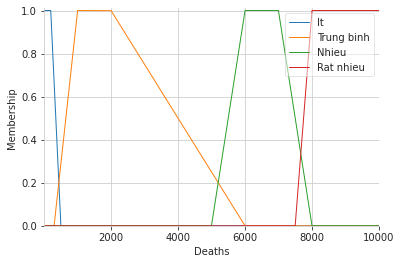

In [ ]:
D["It"] = fz.trapmf( D.universe,[1,1,200,500] )
D["Trung binh"] = fz.trapmf( D.universe,[300,1000,2000,6000] )
D["Nhieu"] = fz.trapmf( D.universe,[5000,6000,7000,8000] )
D["Rat nhieu"] = fz.trapmf( D.universe,[7500,8000,10000,10000] )
D.view()

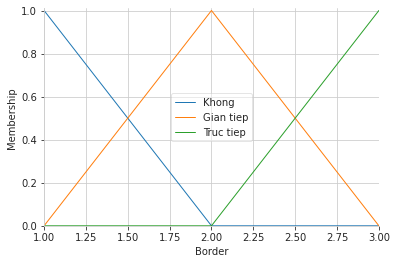

In [ ]:
B["Khong"] = fz.trimf( B.universe,[1,1,2] )
B["Gian tiep"] = fz.trimf( B.universe,[1,2,3] )
B["Truc tiep"] = fz.trimf( B.universe,[2,3,3] )
B.view()

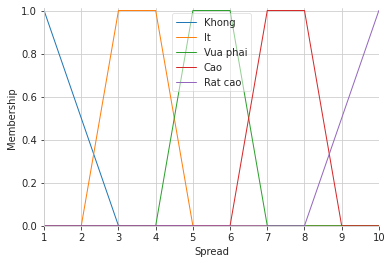

In [ ]:
S["Khong"] = fz.trimf( S.universe,[1,1,3] )
S["It"] = fz.trapmf( S.universe,[2,3,4,5] )
S["Vua phai"] = fz.trapmf( S.universe,[4,5,6,7] )
S["Cao"] = fz.trapmf( S.universe,[6,7,8,9] )
S["Rat cao"] = fz.trimf( S.universe,[8,10,10] )
S.view()

In [ ]:
R1 = ctrl.Rule( C["It"] & D["It"] & (B["Khong"]), S["Khong"] )
R2 = ctrl.Rule( C["It"] & D["It"] & (B["Gian tiep"]), S["It"] )
R3 = ctrl.Rule( C["It"] & D["It"] & (B["Truc tiep"]), S["Khong"] )
R4 = ctrl.Rule( C["It"] & D["Trung binh"] & (B["Khong"]), S["Khong"] )
R5_6 = ctrl.Rule( C["It"] & D["Trung binh"] & (B["Gian tiep"] | B["Truc tiep"]), S["It"] )
R7_8_9 = ctrl.Rule( C["It"] & D["Nhieu"] & (B["Khong"] | B["Gian tiep"] | B["Truc tiep"]), S["Vua phai"] )
R10_11_12 = ctrl.Rule( C["It"] & D["Rat nhieu"] & (B["Khong"]|B["Gian tiep"]|B["Truc tiep"]), S["Vua phai"])
R13 = ctrl.Rule( C["Trung binh"] & D["It"] & (B["Khong"]), S["Khong"] )
R14_15 = ctrl.Rule( C["Trung binh"] & D["It"] & (B["Gian tiep"] | B["Truc tiep"]), S["It"] )
R16 = ctrl.Rule( C["Trung binh"] & D["Trung binh"] & (B["Khong"]), S["It"] )
R17_18 = ctrl.Rule( C["Trung binh"] & D["Trung binh"] & (B["Gian tiep"] | B["Truc tiep"]), S["Vua phai"] )
R19 = ctrl.Rule( C["Trung binh"] & D["Nhieu"] & (B["Khong"]), S["Vua phai"] )
R20 = ctrl.Rule( C["Trung binh"] & D["Nhieu"] & (B["Gian tiep"]), S["Cao"] )
R21 = ctrl.Rule( C["Trung binh"] & D["Nhieu"] & (B["Truc tiep"]), S["It"] )

R22 = ctrl.Rule( C["Trung binh"] & D["Rat nhieu"] & (B["Khong"]), S["Vua phai"] )
R23 = ctrl.Rule( C["Trung binh"] & D["Rat nhieu"] & (B["Gian tiep"]), S["Cao"] )
R24 = ctrl.Rule( C["Trung binh"] & D["Rat nhieu"] & (B["Truc tiep"]), S["Vua phai"] )
R25_26 = ctrl.Rule( C["Nhieu"] & D["It"] & (B["Khong"] | B["Gian tiep"]), S["Vua phai"] )
R27 = ctrl.Rule( C["Nhieu"] & D["It"] & (B["Truc tiep"]), S["It"] )
R28 = ctrl.Rule( C["Nhieu"] & D["Trung binh"] & (B["Khong"]), S["Vua phai"] )
R29 = ctrl.Rule( C["Nhieu"] & D["Trung binh"] & (B["Gian tiep"]), S["Cao"] )
R30 = ctrl.Rule( C["Nhieu"] & D["Trung binh"] & (B["Truc tiep"]), S["It"] )
R31 = ctrl.Rule( C["Nhieu"] & D["Nhieu"] & (B["Khong"]), S["It"] )
R32 = ctrl.Rule( C["Nhieu"] & D["Nhieu"] & (B["Gian tiep"]), S["Cao"] )
R33 = ctrl.Rule( C["Nhieu"] & D["Nhieu"] & (B["Truc tiep"]), S["Vua phai"] )
R34 = ctrl.Rule( C["Nhieu"] & D["Rat nhieu"] & (B["Khong"]), S["Cao"] )
R35 = ctrl.Rule( C["Nhieu"] & D["Rat nhieu"] & (B["Gian tiep"]), S["Rat cao"] )
R36 = ctrl.Rule( C["Nhieu"] & D["Rat nhieu"] & (B["Truc tiep"]), S["Cao"] )
R37_38_39 = ctrl.Rule( C["Rat nhieu"] & D["It"] & (B["Khong"] | B["Gian tiep"]|B["Truc tiep"]), S["Vua phai"])
R40 = ctrl.Rule( C["Rat nhieu"] & D["Trung binh"] & (B["Khong"]), S["Vua phai"] )
R41 = ctrl.Rule( C["Rat nhieu"] & D["Trung binh"] & (B["Gian tiep"]), S["Cao"] )
R42 = ctrl.Rule( C["Rat nhieu"] & D["Trung binh"] & (B["Truc tiep"]), S["Vua phai"] )
R43 = ctrl.Rule( C["Rat nhieu"] & D["Nhieu"] & (B["Khong"]), S["Cao"] )
R44 = ctrl.Rule( C["Rat nhieu"] & D["Nhieu"] & (B["Gian tiep"]), S["Rat cao"] )
R45 = ctrl.Rule( C["Rat nhieu"] & D["Nhieu"] & (B["Truc tiep"]), S["Cao"] )
R46 = ctrl.Rule( C["Rat nhieu"] & D["Rat nhieu"] & (B["Khong"]), S["Cao"] )
R47 = ctrl.Rule( C["Rat nhieu"] & D["Rat nhieu"] & (B["Gian tiep"]), S["Rat cao"] )
R48 = ctrl.Rule( C["Rat nhieu"] & D["Rat nhieu"] & (B["Truc tiep"]), S["Cao"] )

In [ ]:
#set rules
rules = [R1,R2,R3,R4,R5_6,R7_8_9,R10_11_12,R13,R14_15,R16,
R17_18,R19,R20,R21,R22,R23,R24,R25_26,R27,R28,R29,R30,R31,R32,
R33,R34,R35,R36,R37_38_39,R40,R41,R42,R43,R44,R45,R46,R47,R48]

system = ctrl.ControlSystemSimulation( ctrl.ControlSystem(rules) )

In [ ]:
#input data
# iC = int( input("Số người bị nhiễm: ") )
# iD = int( input("Tổng số tử vong: ") )
# iB = int( input("Mức độ tiếp giáp (1:không, 2:Gian Tiep, 3:Truc tiep): ") )
iC = int(np.sum(SoNguoiNhiem14Ngay.to_numpy()))
iD = int(np.sum(SoNguoiTuVong14NgayGanNhat.to_numpy()))
iB = 3
system.input["Cases"] = iC
system.input["Deaths"] = iD
system.input["Border"] = iB

Số người nhiễm 35828, tử vong 586; tiếp giáp cấp độ 3. Khả năng lây lan cấp độ 5


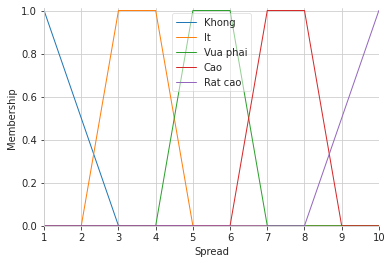

In [ ]:
system.compute()
oS = system.output["Spread"]
print("Số người nhiễm %d, tử vong %d; tiếp giáp cấp độ %d. Khả năng lây lan cấp độ %d" % (iC,iD,iB,oS))
S.view( system )

Text(0.5, 1.0, 'Biểu đồ đường thể hiện độ tương quan giữa Bị nhiễm, Tử Vong và Âm tính')

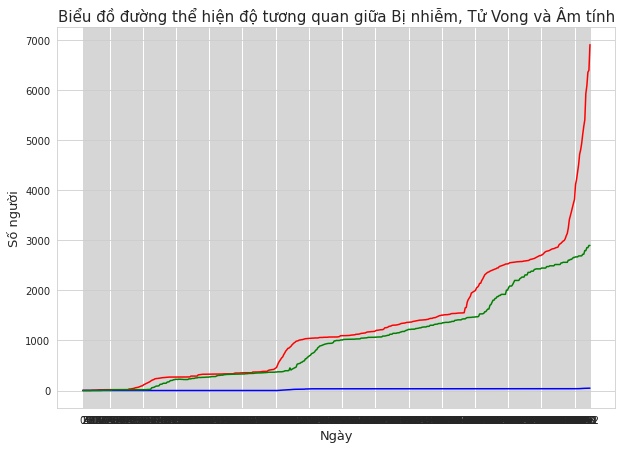

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

Ngay = list(map(str, range(len(SoNguoiAmTinhVietNam))))

fig = plt.subplots(figsize =(10, 7))
plt.plot(Ngay, SoNguoiBiNhiemVietNam, color='red', marker='')
plt.plot(Ngay, SoNguoiTuVongVietNam, color='blue', marker='')
plt.plot(Ngay, SoNguoiAmTinhVietNam, color='green', marker='')
plt.ylabel('Số người', fontsize = '13')
plt.xlabel('Ngày', fontsize = '13')
plt.title('Biểu đồ đường thể hiện độ tương quan giữa Bị nhiễm, Tử Vong và Âm tính', fontsize = '15')





In [ ]:
print(type(SoNguoiBiNhiemVietNam)) 
print(type(SoNguoiTuVongVietNam))
print(type(SoNguoiAmTinhVietNam))
SoNguoiBiNhiemVietNam = SoNguoiBiNhiemVietNam.to_numpy()
SoNguoiTuVongVietNam = SoNguoiTuVongVietNam.to_numpy()
SoNguoiAmTinhVietNam = SoNguoiAmTinhVietNam.to_numpy()
print(type(SoNguoiBiNhiemVietNam)) 
print(type(SoNguoiTuVongVietNam))
print(type(SoNguoiAmTinhVietNam))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


492
492
Feature: 0, Score: 1.02295


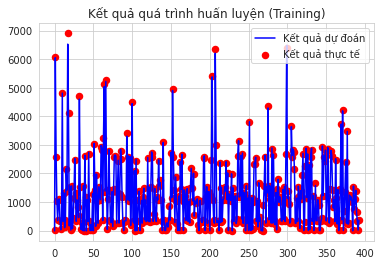

Mean Squared Error: 1093.0501243664105
Root Mean Squared Error: 33.06130857008552
0.9992408817579417


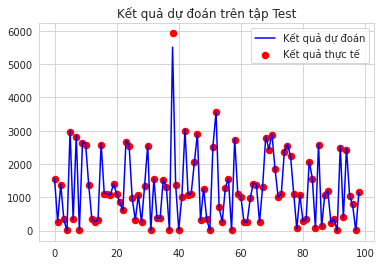

Mean Squared Error: 2195.863729340714
Root Mean Squared Error: 46.860044060379565
0.9979886877408904


In [ ]:
# Dự đoán số người nhiễm bệnh Việt Nam

X = list()
Y = list()

count = 0
for i in range(len(SoNguoiBiNhiemVietNam)):
  if count == 0:
    X.append(SoNguoiBiNhiemVietNam[i])
    count = 1
  else:
    Y.append(SoNguoiBiNhiemVietNam[i])
    X.append(SoNguoiBiNhiemVietNam[i])

X = X[:-1]

# Chuyển danh sách sang mảng 2 chiều
X = np.array(X).reshape(-1,1)
Y = np.array(Y).reshape(-1,1)

# Xếp hạng các đặc trưng dựa theo điểm số (thuật toán cây quyết định)
from sklearn.linear_model import LinearRegression
model =  LinearRegression()
model.fit(X,Y)
importance = model.coef_
# tính toán độ quan trọng feature importance
print('Trích xuất đặc trưng.')
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

from sklearn.model_selection import train_test_split
# Cắt tập dữ liệu ra làm 2 phần training(80%) và test(20%).
# shuffle=True để xáo trộn dữ liệu, tăng tính ngẫu nhiên cho mô hình
x_training, x_test, y_training, y_test = train_test_split(X,Y,test_size=0.20, 
                                                          random_state=0,
                                                          shuffle=True)

# Dự đoán bằng hồi quy tuyến tính
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(x_training, y_training)
pred_y = model.predict(x_training)
x_ax=range(len(x_training))
plt.scatter(x_ax, y_training, lw=1.5, color="red",
         label="Kết quả thực tế")
plt.plot(x_ax, pred_y, lw=1.5, color="blue",
         label="Kết quả dự đoán")
plt.title("Kết quả quá trình huấn luyện (Training)")
plt.legend()
plt.show()

mse = mean_squared_error(y_training, pred_y)
print("Mean Squared Error:",mse)
rmse = math.sqrt(mse)
print("Root Mean Squared Error:", rmse)
print(r2_score(y_training, pred_y))

# Dự đoán
pred_y_test = model.predict(x_test)
x_ax=range(len(x_test))
plt.scatter(x_ax, y_test, lw=1.5, color="red",
         label="Kết quả thực tế")
plt.plot(x_ax, pred_y_test, lw=1.5, color="blue",
         label="Kết quả dự đoán")
plt.title("Kết quả dự đoán trên tập Test")
plt.legend()
plt.show()

# Hiển thị sai số.
mse = mean_squared_error(y_test, pred_y_test)
print("Mean Squared Error:",mse)
rmse = math.sqrt(mse)
print("Root Mean Squared Error:", rmse)
print(r2_score(y_test, pred_y_test))

Text(0.5, 1.0, 'Đường thẳng (linear) trên tập Training')

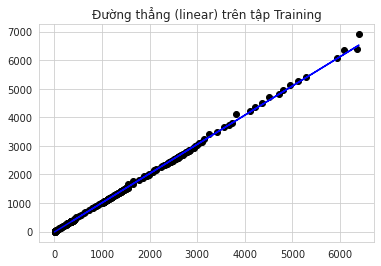

In [ ]:
# Đường thẳng (linear) trên tập Training
plt.scatter(x_training, y_training,color='black')
plt.plot(x_training, pred_y,color='blue')

plt.title('Đường thẳng (linear) trên tập Training')

Text(0.5, 1.0, 'Đường thẳng (linear) trên tập Test')

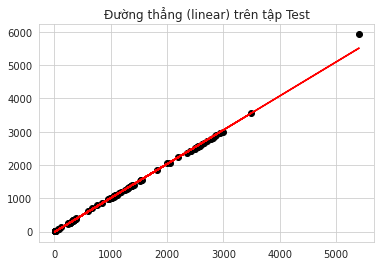

In [ ]:
# Đường thẳng (linear) trên tập Test
plt.scatter(x_test, y_test,color='black')
plt.plot(x_test, pred_y_test,color='red')
plt.title('Đường thẳng (linear) trên tập Test')

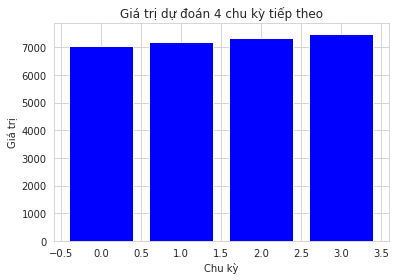

Giá trị dự đoán 4 chu kỳ tiếp theo
[7049.66327875 7194.50775061 7342.6048525  7494.02762554]


In [ ]:
# Dự đoán 4 chu kỳ(ngày) tiếp theo
# Lấy giá trị gần đây nhất làm tham chiếu
giaTriGanNhat = SoNguoiBiNhiemVietNam[-1].reshape(-1,1)

danhSachGiaTriDuDoan = list()
# Vòng lặp lấy 4 giá trị tiếp theo
for i in range(4):
  giaTriDuDoan = model.predict(giaTriGanNhat)
  danhSachGiaTriDuDoan.append(giaTriDuDoan)
  giaTriGanNhat = giaTriDuDoan

# Chuyển danh sách về dạng numpy array
danhSachGiaTriDuDoan = np.array(danhSachGiaTriDuDoan).reshape(-1,1)

danhSachGiaTriDuDoan = danhSachGiaTriDuDoan.flatten()
x_ax=range(len(danhSachGiaTriDuDoan))

plt.bar(x_ax, danhSachGiaTriDuDoan,
        width = 0.8, color = 'blue')
plt.xlabel('Chu kỳ')
plt.ylabel('Giá trị')
plt.title('Giá trị dự đoán 4 chu kỳ tiếp theo')
plt.show()
print("Giá trị dự đoán 4 chu kỳ tiếp theo")
print(danhSachGiaTriDuDoan)

Trích xuất đặc trưng.
Feature: 0, Score: 1.00060


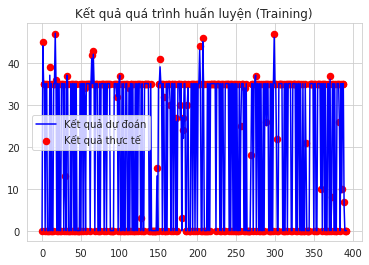

Mean Squared Error: 0.191487493875497
Root Mean Squared Error: 0.43759284029277373
0.9993511534914841


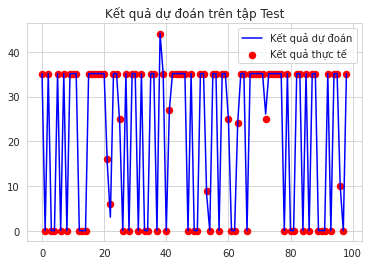

Mean Squared Error: 0.13518866429087684
Root Mean Squared Error: 0.3676801113615976
0.9994964851969755


In [ ]:
# Dự đoán số người tử vong bệnh Việt Nam

X = list()
Y = list()

count = 0
for i in range(len(SoNguoiTuVongVietNam)):
  if count == 0:
    X.append(SoNguoiTuVongVietNam[i])
    count = 1
  else:
    Y.append(SoNguoiTuVongVietNam[i])
    X.append(SoNguoiTuVongVietNam[i])

X = X[:-1]

# Chuyển danh sách sang mảng 2 chiều
X = np.array(X).reshape(-1,1)
Y = np.array(Y).reshape(-1,1)

# Xếp hạng các đặc trưng dựa theo điểm số (thuật toán cây quyết định)
from sklearn.linear_model import LinearRegression
model =  LinearRegression()
model.fit(X,Y)
importance = model.coef_
# tính toán độ quan trọng feature importance
print('Trích xuất đặc trưng.')
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
 
from sklearn.model_selection import train_test_split
# Cắt tập dữ liệu ra làm 2 phần training(80%) và test(20%).
# shuffle=True để xáo trộn dữ liệu, tăng tính ngẫu nhiên cho mô hình
x_training, x_test, y_training, y_test = train_test_split(X,Y,test_size=0.20, 
                                                          random_state=0,
                                                          shuffle=True)

# Dự đoán bằng hồi quy tuyến tính
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(x_training, y_training)
pred_y = model.predict(x_training)
x_ax=range(len(x_training))
plt.scatter(x_ax, y_training, lw=1.5, color="red",
         label="Kết quả thực tế")
plt.plot(x_ax, pred_y, lw=1.5, color="blue",
         label="Kết quả dự đoán")
plt.title("Kết quả quá trình huấn luyện (Training)")
plt.legend()
plt.show()

mse = mean_squared_error(y_training, pred_y)
print("Mean Squared Error:",mse)
rmse = math.sqrt(mse)
print("Root Mean Squared Error:", rmse)
print(r2_score(y_training, pred_y))

# Dự đoán
pred_y_test = model.predict(x_test)
x_ax=range(len(x_test))
plt.scatter(x_ax, y_test, lw=1.5, color="red",
         label="Kết quả thực tế")
plt.plot(x_ax, pred_y_test, lw=1.5, color="blue",
         label="Kết quả dự đoán")
plt.title("Kết quả dự đoán trên tập Test")
plt.legend()
plt.show()

# Hiển thị sai số.
mse = mean_squared_error(y_test, pred_y_test)
print("Mean Squared Error:",mse)
rmse = math.sqrt(mse)
print("Root Mean Squared Error:", rmse)
print(r2_score(y_test, pred_y_test))


Text(0.5, 1.0, 'Đường thẳng (linear) trên tập Training')

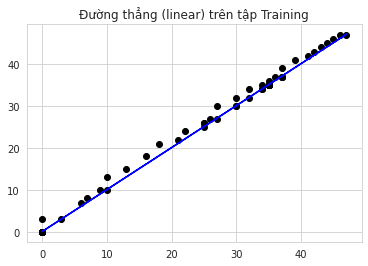

In [ ]:
# Đường thẳng (linear) trên tập Training
plt.scatter(x_training, y_training,color='black')
plt.plot(x_training, pred_y,color='blue')

plt.title('Đường thẳng (linear) trên tập Training')

Text(0.5, 1.0, 'Đường thẳng (linear) trên tập Test')

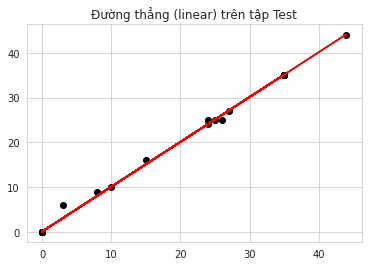

In [ ]:
# Đường thẳng (linear) trên tập Test
plt.scatter(x_test, y_test,color='black')
plt.plot(x_test, pred_y_test,color='red')
plt.title('Đường thẳng (linear) trên tập Test')

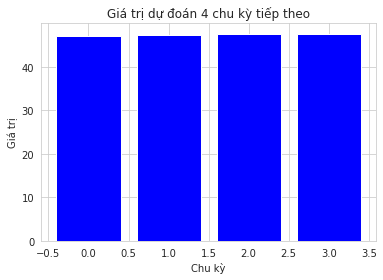

Giá trị dự đoán 4 chu kỳ tiếp theo
[47.14656656 47.29335163 47.44035554 47.58757862]


In [ ]:
# Dự đoán 4 chu kỳ(ngày) tiếp theo
# Lấy giá trị gần đây nhất làm tham chiếu
giaTriGanNhat = SoNguoiTuVongVietNam[-1].reshape(-1,1)

danhSachGiaTriDuDoan = list()
# Vòng lặp lấy 4 giá trị tiếp theo
for i in range(4):
  giaTriDuDoan = model.predict(giaTriGanNhat)
  danhSachGiaTriDuDoan.append(giaTriDuDoan)
  giaTriGanNhat = giaTriDuDoan

# Chuyển danh sách về dạng numpy array
danhSachGiaTriDuDoan = np.array(danhSachGiaTriDuDoan).reshape(-1,1)

danhSachGiaTriDuDoan = danhSachGiaTriDuDoan.flatten()
x_ax=range(len(danhSachGiaTriDuDoan))

plt.bar(x_ax, danhSachGiaTriDuDoan,
        width = 0.8, color = 'blue')
plt.xlabel('Chu kỳ')
plt.ylabel('Giá trị')
plt.title('Giá trị dự đoán 4 chu kỳ tiếp theo')
plt.show()
print("Giá trị dự đoán 4 chu kỳ tiếp theo")
print(danhSachGiaTriDuDoan)

Trích xuất đặc trưng.
Feature: 0, Score: 1.00383


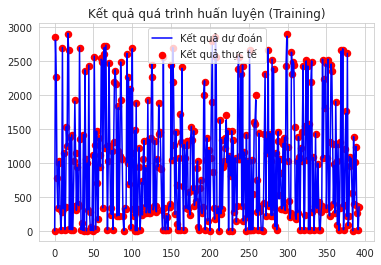

Mean Squared Error: 137.63525821363808
Root Mean Squared Error: 11.73180541151438
0.9998051127656842


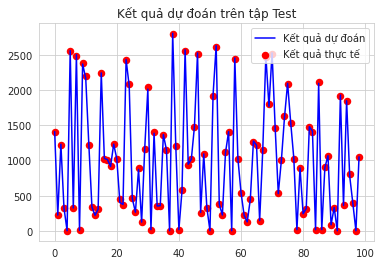

Mean Squared Error: 118.10495465336749
Root Mean Squared Error: 10.86761034696071
0.9998203575273974


In [ ]:
# Dự đoán số người tử vong bệnh Việt Nam

X = list()
Y = list()

count = 0
for i in range(len(SoNguoiAmTinhVietNam)):
  if count == 0:
    X.append(SoNguoiAmTinhVietNam[i])
    count = 1
  else:
    Y.append(SoNguoiAmTinhVietNam[i])
    X.append(SoNguoiAmTinhVietNam[i])

X = X[:-1]

# Chuyển danh sách sang mảng 2 chiều
X = np.array(X).reshape(-1,1)
Y = np.array(Y).reshape(-1,1)

# Xếp hạng các đặc trưng dựa theo điểm số (thuật toán cây quyết định)
from sklearn.linear_model import LinearRegression
model =  LinearRegression()
model.fit(X,Y)
importance = model.coef_
# tính toán độ quan trọng feature importance
print('Trích xuất đặc trưng.')
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

from sklearn.model_selection import train_test_split
# Cắt tập dữ liệu ra làm 2 phần training(80%) và test(20%).
# shuffle=True để xáo trộn dữ liệu, tăng tính ngẫu nhiên cho mô hình
x_training, x_test, y_training, y_test = train_test_split(X,Y,test_size=0.20, 
                                                          random_state=0,
                                                          shuffle=True)

# Dự đoán bằng hồi quy tuyến tính
from sklearn import linear_model
model = linear_model.LinearRegression()
model.fit(x_training, y_training)
pred_y = model.predict(x_training)
x_ax=range(len(x_training))
plt.scatter(x_ax, y_training, lw=1.5, color="red",
         label="Kết quả thực tế")
plt.plot(x_ax, pred_y, lw=1.5, color="blue",
         label="Kết quả dự đoán")
plt.title("Kết quả quá trình huấn luyện (Training)")
plt.legend()
plt.show()

mse = mean_squared_error(y_training, pred_y)
print("Mean Squared Error:",mse)
rmse = math.sqrt(mse)
print("Root Mean Squared Error:", rmse)
print(r2_score(y_training, pred_y))

# Dự đoán
pred_y_test = model.predict(x_test)
x_ax=range(len(x_test))
plt.scatter(x_ax, y_test, lw=1.5, color="red",
         label="Kết quả thực tế")
plt.plot(x_ax, pred_y_test, lw=1.5, color="blue",
         label="Kết quả dự đoán")
plt.title("Kết quả dự đoán trên tập Test")
plt.legend()
plt.show()

# Hiển thị sai số.
mse = mean_squared_error(y_test, pred_y_test)
print("Mean Squared Error:",mse)
rmse = math.sqrt(mse)
print("Root Mean Squared Error:", rmse)
print(r2_score(y_test, pred_y_test))

Text(0.5, 1.0, 'Đường thẳng (linear) trên tập Training')

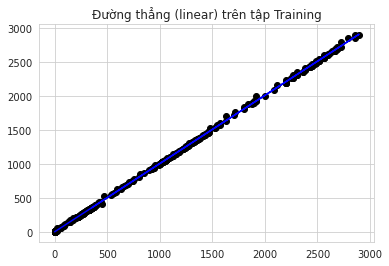

In [ ]:
# Đường thẳng (linear) trên tập Training
plt.scatter(x_training, y_training,color='black')
plt.plot(x_training, pred_y,color='blue')

plt.title('Đường thẳng (linear) trên tập Training')

Text(0.5, 1.0, 'Đường thẳng (linear) trên tập Test')

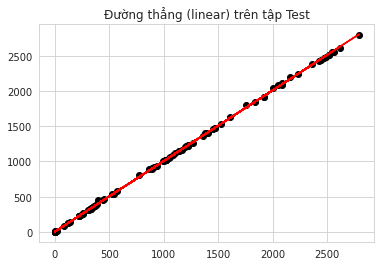

In [ ]:
# Đường thẳng (linear) trên tập Test
plt.scatter(x_test, y_test,color='black')
plt.plot(x_test, pred_y_test,color='red')
plt.title('Đường thẳng (linear) trên tập Test')

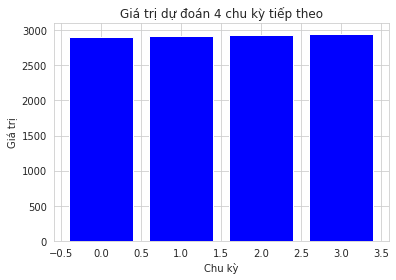

Giá trị dự đoán 4 chu kỳ tiếp theo
[2909.56348395 2923.18165895 2936.85474555 2950.58296515]


In [ ]:
# Dự đoán 4 chu kỳ(ngày) tiếp theo
# Lấy giá trị gần đây nhất làm tham chiếu
giaTriGanNhat = SoNguoiAmTinhVietNam[-1].reshape(-1,1)

danhSachGiaTriDuDoan = list()
# Vòng lặp lấy 4 giá trị tiếp theo
for i in range(4):
  giaTriDuDoan = model.predict(giaTriGanNhat)
  danhSachGiaTriDuDoan.append(giaTriDuDoan)
  giaTriGanNhat = giaTriDuDoan

# Chuyển danh sách về dạng numpy array
danhSachGiaTriDuDoan = np.array(danhSachGiaTriDuDoan).reshape(-1,1)

danhSachGiaTriDuDoan = danhSachGiaTriDuDoan.flatten()
x_ax=range(len(danhSachGiaTriDuDoan))

plt.bar(x_ax, danhSachGiaTriDuDoan,
        width = 0.8, color = 'blue')
plt.xlabel('Chu kỳ')
plt.ylabel('Giá trị')
plt.title('Giá trị dự đoán 4 chu kỳ tiếp theo')
plt.show()
print("Giá trị dự đoán 4 chu kỳ tiếp theo")
print(danhSachGiaTriDuDoan)